In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [132]:
#Unpickle file 
df = pd.read_pickle("./cleaned_data.pkl")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 19 to 39
Data columns (total 12 columns):
hotel_name          292 non-null object
rating              292 non-null float64
walk_score          292 non-null int64
res_score           292 non-null int64
attraction_score    292 non-null int64
num_reviews         292 non-null int64
num_QA              292 non-null int64
num_Tips            292 non-null int64
num_rooms           292 non-null int64
min_price           292 non-null float64
max_price           292 non-null float64
avg_price           292 non-null float64
dtypes: float64(4), int64(7), object(1)
memory usage: 29.7+ KB


In [24]:
df.describe()

,rating,walk_score,res_score,attraction_score,num_reviews,num_QA,num_Tips,num_rooms,min_price,max_price,avg_price
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,3.698630,90.736301,293.630137,42.133562,857.373288,25.215753,45.044521,142.565068,121.099315,305.698630,213.398973
std,0.757504,12.985942,237.140729,36.818949,1640.250237,37.802044,39.898084,186.136056,100.772687,403.745835,243.994833
min,1.000000,36.000000,12.000000,1.000000,1.000000,0.000000,0.000000,1.000000,16.000000,36.000000,26.000000
25%,3.500000,81.000000,88.000000,11.000000,45.750000,2.000000,6.000000,35.750000,62.750000,150.000000,105.875000
50%,4.000000,99.500000,248.500000,29.500000,243.000000,10.000000,32.500000,75.000000,98.000000,217.000000,157.500000
75%,4.500000,100.000000,436.250000,70.000000,750.250000,33.250000,100.000000,175.000000,146.250000,319.250000,237.750000
max,5.000000,100.000000,969.000000,132.000000,11943.000000,208.000000,100.000000,1500.000000,815.000000,5151.000000,2983.000000


# Pairplot

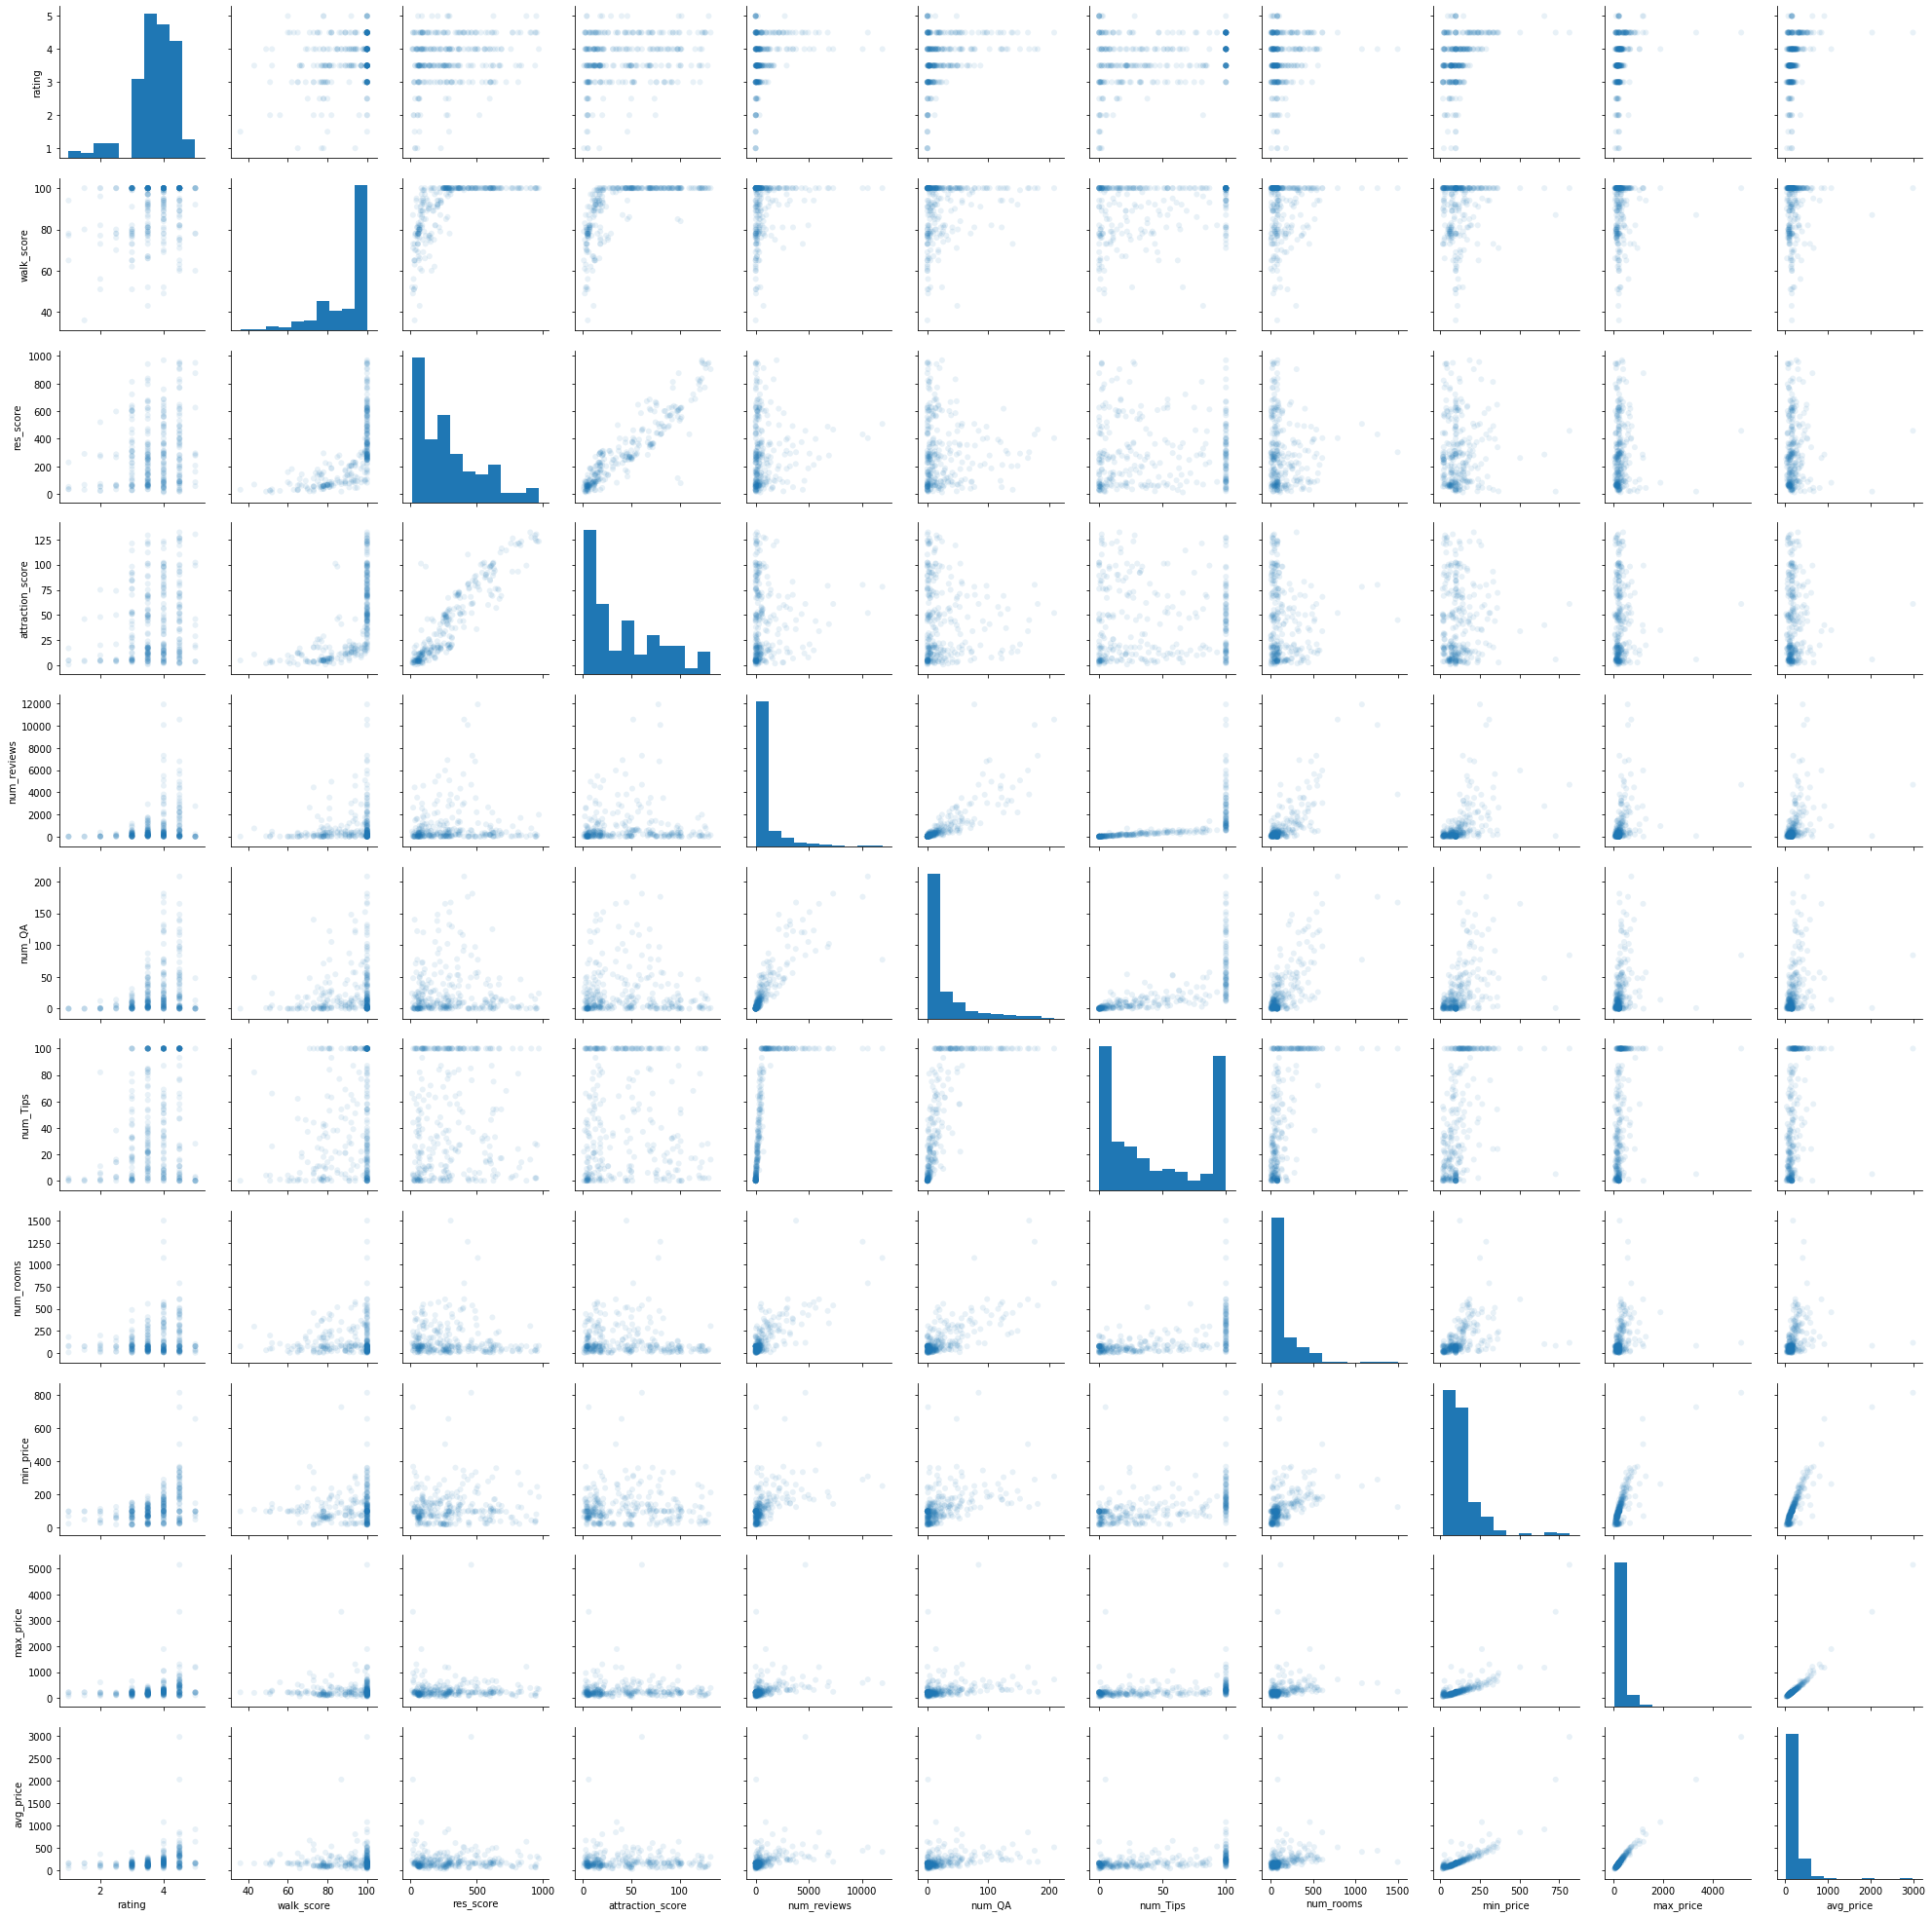

In [56]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'));

# Transformations

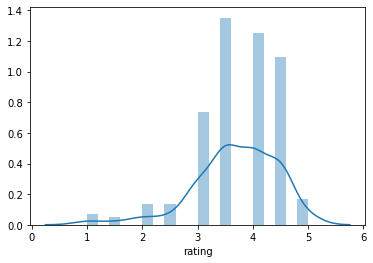

In [4]:
#rating
sns.distplot(df.rating, bins=20);

In [5]:
transform = np.asarray(df[['rating']].values)
rating_t = stats.boxcox(transform)[0]
df['rating'] = rating_t

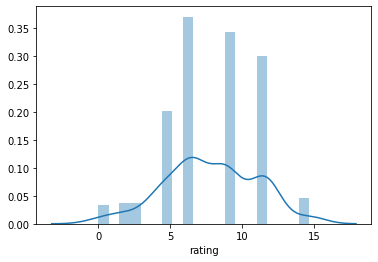

In [6]:
#rating transformed
sns.distplot(df.rating, bins=20);

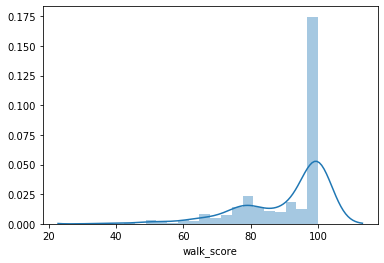

In [57]:
#walk_score - right-skewed - to create new dummy variable since there are a bulk of listings with the 'perfect' (100) walk score
sns.distplot(df.walk_score, bins=20);

In [58]:
#separating walk_score into perfect and imperfect
df['walkability'] = [np.random.choice(('perfect', 'less_perfect')) for i in range(df.shape[0])]
dummies = pd.get_dummies(df['walkability'])
def walkability (row):
    if row['walk_score'] == 100 :
          return 'walk_perfect'
    if row['walk_score'] < 100 :
          return 'walk_imperfect'
df.apply (lambda row: walkability(row), axis=1)
df['walkability'] = df.apply (lambda row: walkability(row), axis=1)
dummies = pd.get_dummies(df['walkability'])
df = pd.concat([df, dummies], axis=1)
df.drop(['walkability'], inplace=True, axis=1)
df.drop(['walk_imperfect'], inplace=True, axis=1)

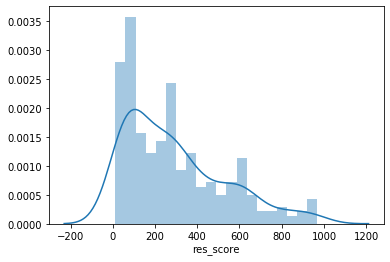

In [59]:
#res_score left-skewed
sns.distplot(modeling_df.res_score, bins=20);

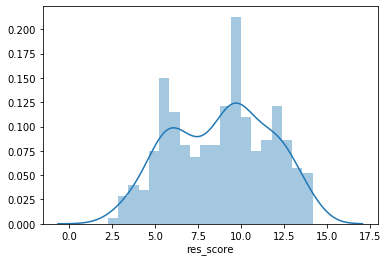

In [61]:
#res_score transformed
transform = np.asarray(df[['res_score']].values)
res_score_t = stats.boxcox(transform)[0]
df['res_score'] = res_score_t
sns.distplot(df.res_score, bins=20);

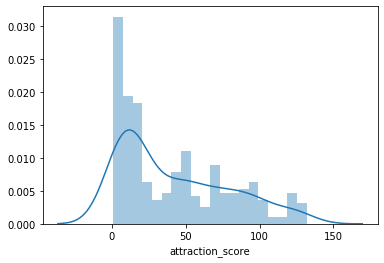

In [17]:
#attraction_score - left-skewed
sns.distplot(df.attraction_score, bins=20);

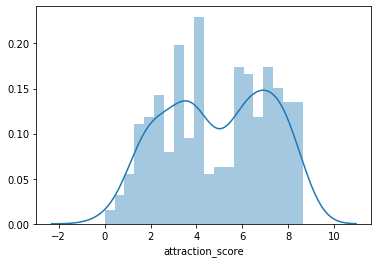

In [62]:
#attraction_score transformed
transform = np.asarray(df[['attraction_score']].values)
attraction_score_t = stats.boxcox(transform)[0]
df['attraction_score'] = attraction_score_t
sns.distplot(df.attraction_score, bins=20);

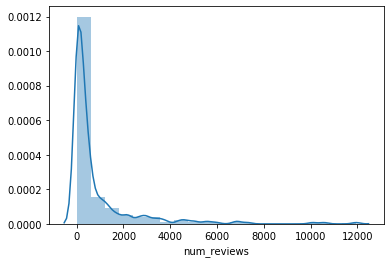

In [19]:
#num_reviews - left-skewed
sns.distplot(df.num_reviews, bins=20);

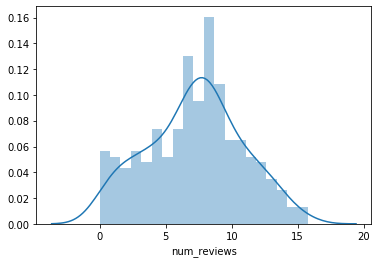

In [63]:
#transformed num_reviews
transform = np.asarray(df[['num_reviews']].values)
num_reviews_t = stats.boxcox(transform)[0]
df['num_reviews'] = num_reviews_t
sns.distplot(df.num_reviews, bins=20);

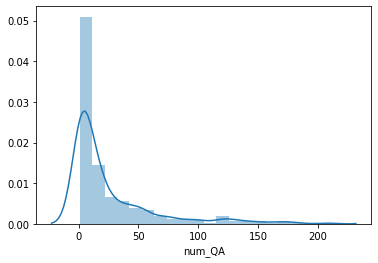

In [136]:
#num_QA - left-skewed
sns.distplot(df.num_QA, bins=20);

In [103]:
#imputing 0 with 1 - don't have to use fillna - too many zero values
df['num_QA'] = df.num_QA.mask(df.num_QA == 0, 1, inplace = True)

In [134]:
num = df.num_QA._get_numeric_data()

In [135]:
num[num == 0] = 1

In [140]:
df.num_QA.describe()

count    292.000000
mean       2.056716
std        1.518432
min        0.000000
25%        0.687244
50%        2.238297
75%        3.356544
max        5.000492
Name: num_QA, dtype: float64

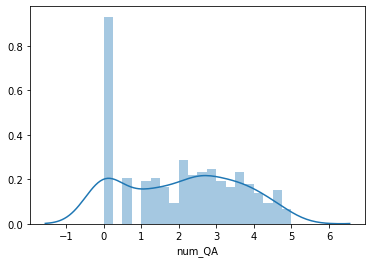

In [139]:
transform = np.asarray(df[['num_QA']].values)
num_QA_t = stats.boxcox(transform)[0]
df['num_QA'] = num_QA_t
sns.distplot(df.num_QA, bins=20);

In [141]:
#
df[df.num_QA == 0].count()

hotel_name          68
rating              68
walk_score          68
res_score           68
attraction_score    68
num_reviews         68
num_QA              68
num_Tips            68
num_rooms           68
min_price           68
max_price           68
avg_price           68
dtype: int64

In [29]:

 #not all zeros are removed?
df['num_Tips']=df.num_QA.mask(df.num_QA == 0, 1)

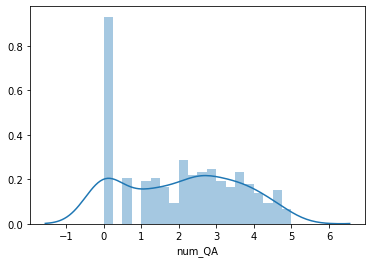

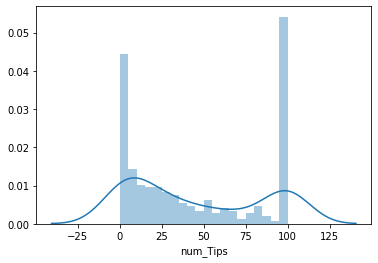

In [24]:
#num_Tips - lots of zeros and 100s
sns.distplot(modeling_df.num_Tips, bins=20);

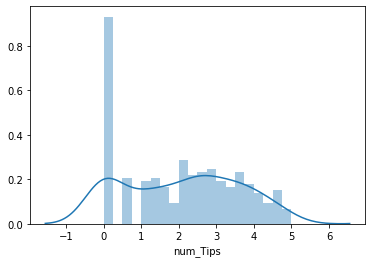

In [34]:
#transformed num_Tips - need to remove 0s
transform = np.asarray(df[['num_Tips']].values)
num_Tips_t = stats.boxcox(transform)[0]
df['num_Tips'] = num_Tips_t
sns.distplot(modeling_df.num_Tips, bins=20);

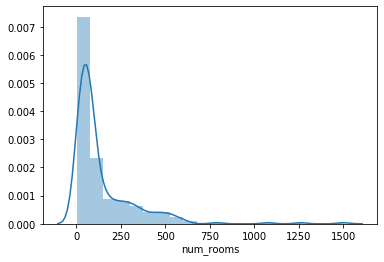

In [27]:
#num_rooms - left-skewed
sns.distplot(modeling_df.num_rooms, bins=20);

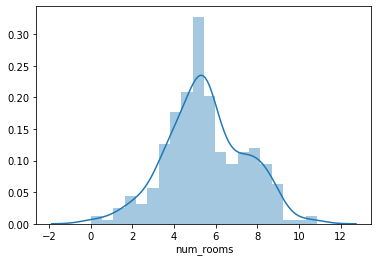

In [35]:
transform = np.asarray(df[['num_rooms']].values)
num_rooms_t = stats.boxcox(transform)[0]
df['num_rooms'] = num_rooms_t
sns.distplot(modeling_df.num_rooms, bins=20);

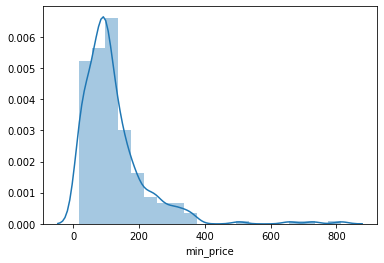

In [30]:
#min_price - left-skewed
sns.distplot(modeling_df.min_price, bins=20);

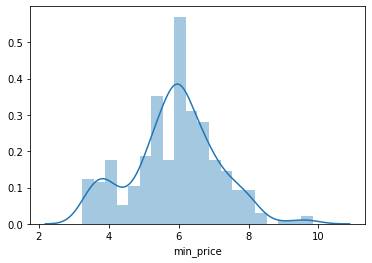

In [37]:
#transformed min_price
transform = np.asarray(df[['min_price']].values)
min_price_t = stats.boxcox(transform)[0]
df['min_price'] = min_price_t
sns.distplot(modeling_df.min_price, bins=20);

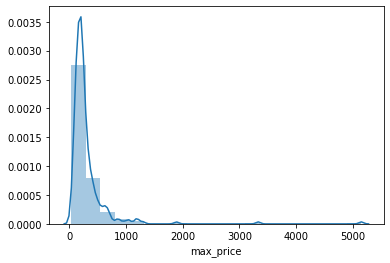

In [32]:
#max_price
sns.distplot(modeling_df.max_price, bins=20);

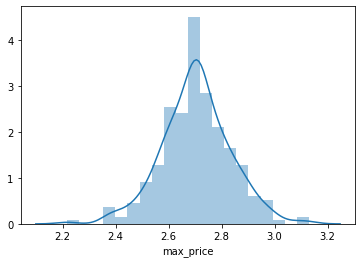

In [38]:
transform = np.asarray(df[['max_price']].values)
max_price_t = stats.boxcox(transform)[0]
df['max_price'] = max_price_t
sns.distplot(modeling_df.max_price, bins=20);

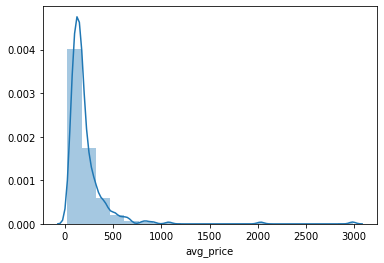

In [34]:
#avg_price - left-skewed
sns.distplot(modeling_df.avg_price, bins=20);

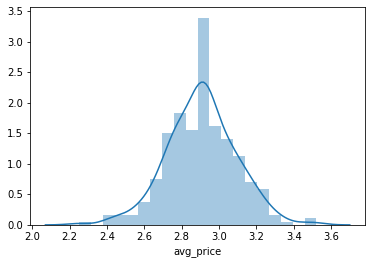

In [40]:
#avg_price transformed
transform = np.asarray(df[['avg_price']].values)
avg_price_t = stats.boxcox(transform)[0]
df['avg_price'] = avg_price_t
sns.distplot(modeling_df.avg_price, bins=20);

In [36]:
df.num_Tips.describe()
# modeling_df.num_rooms.max()

count    292.000000
mean       2.056716
std        1.518432
min        0.000000
25%        0.687244
50%        2.238297
75%        3.356544
max        5.000492
Name: num_Tips, dtype: float64

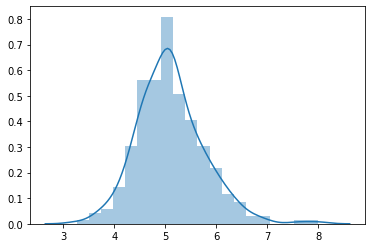

In [35]:
#logged avg price
log_avg_price = [math.log(d) for d in df ['avg_price']]
sns.distplot(log_avg_price, bins=20);

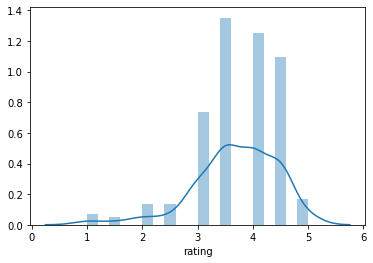

In [37]:
sns.distplot(modeling_df.rating, bins=20);

# Correlations

In [46]:
df.corr()

,rating,walk_score,res_score,attraction_score,num_reviews,num_QA,num_Tips,num_rooms,min_price,max_price,avg_price,walk_perfect
rating,1.000000,0.231890,0.209502,0.217746,0.271871,0.341484,0.341484,0.112940,0.349467,0.358416,0.365415,0.153977
walk_score,0.231890,1.000000,0.624889,0.617027,0.185594,0.235494,0.235494,0.047403,0.037061,0.080273,0.065608,0.714588
res_score,0.209502,0.624889,1.000000,0.921711,0.048756,-0.007537,-0.007537,-0.121818,0.009690,0.051960,0.041557,0.749004
attraction_score,0.217746,0.617027,0.921711,1.000000,0.037212,-0.013016,-0.013016,-0.130975,-0.004918,0.038944,0.025335,0.784611
num_reviews,0.271871,0.185594,0.048756,0.037212,1.000000,0.634448,0.634448,0.601325,0.487503,0.444331,0.463974,0.149316
num_QA,0.341484,0.235494,-0.007537,-0.013016,0.634448,1.000000,1.000000,0.590572,0.484215,0.401409,0.434879,0.062121
num_Tips,0.341484,0.235494,-0.007537,-0.013016,0.634448,1.000000,1.000000,0.590572,0.484215,0.401409,0.434879,0.062121
num_rooms,0.112940,0.047403,-0.121818,-0.130975,0.601325,0.590572,0.590572,1.000000,0.575677,0.432290,0.485412,-0.031116
min_price,0.349467,0.037061,0.009690,-0.004918,0.487503,0.484215,0.484215,0.575677,1.000000,0.791295,0.877324,0.065134
max_price,0.358416,0.080273,0.051960,0.038944,0.444331,0.401409,0.401409,0.432290,0.791295,1.000000,0.985521,0.093139


In [47]:
df.columns

Index(['hotel_name', 'rating', 'walk_score', 'res_score', 'attraction_score',
       'num_reviews', 'num_QA', 'num_Tips', 'num_rooms', 'min_price',
       'max_price', 'avg_price', 'walk_perfect'],
      dtype='object')

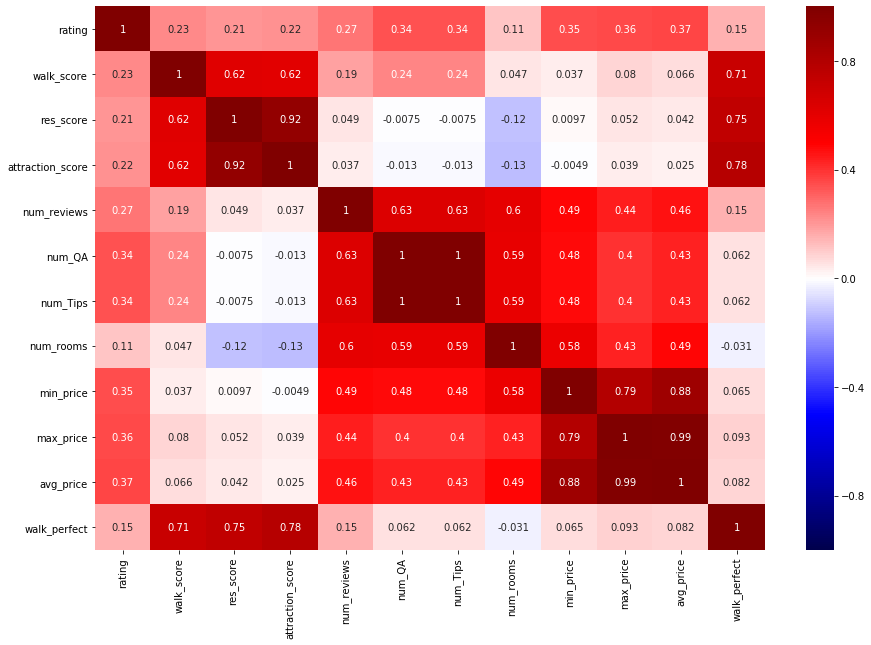

In [52]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [43]:
df.head()

,hotel_name,rating,walk_score,res_score,attraction_score,num_reviews,num_QA,num_Tips,num_rooms,min_price,max_price,avg_price
19,30 Bencoolen,4.5,100,352,58,545,3.781731,3.781731,6.313775,7.024745,2.810650,3.067700
6,5footway.inn Project Ann Siang,3.5,100,941,129,235,2.619422,2.619422,3.863909,4.158465,2.636037,2.750133
44,7 Wonders Hostel,3.5,97,302,18,133,2.138635,2.138635,2.462549,4.111013,2.769541,2.924059
54,7 Wonders Hostel At Upper Dickson,4.5,100,248,44,4,0.000000,0.000000,5.422903,3.732644,2.699775,2.820226
13,@ Little Red Dot,4.0,90,135,12,458,1.577851,1.577851,3.360922,3.393095,2.387583,2.429058


In [43]:
#picking
df.to_pickle("./modeling_df.pkl")